In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from tensorflow.keras.datasets import fashion_mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import SVG
import plotly as ply

In [ ]:
# train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
# test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [ ]:
# train['label'].nunique()

In [ ]:
# train.pixel4.describe()

In [ ]:
# train.describe().T

In [ ]:
# X_train = train.drop(columns='label')
# y_train = train['label']

# X_test = test.drop(columns='label')
# y_test = test['label']
print(X_train.shape[0] == y_train.shape[0], X_test.shape[0] == y_test.shape[0])

True True


In [ ]:
# literally just repurposed the model from the convolutional neural network lessons  
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train_sc = X_train / 255.0
X_test_sc = X_test / 255.0

In [ ]:
X_train_sc.shape

(60000, 28, 28)

In [ ]:
X_train_sc = X_train_sc.reshape(X_train.shape[0], 28, 28, 1)
X_test_sc = X_test_sc.reshape(X_test_sc.shape[0], 28, 28, 1)

In [ ]:
# sc = StandardScaler()
# X_train_sc = sc.fit_transform(X_train)
# X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc.shape

(60000, 28, 28, 1)

In [ ]:
X_train_sc.shape[1:]

(28, 28, 1)

In [ ]:
 "hidden_neurons": [32],
    "filters": [32],
    "reg": [0.0001],
    "hidden_layers": [2], 
    "kernel_size": [(5, 5)],
    "dropout": [0.1],

In [ ]:
images = np.array([X_train_sc, X_test_sc])
batch_size, height, width, channels = images.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
# literally just repurposed the model from the convolutional neural network lessons  
model = Sequential()
input_shape = X_train_sc.shape[1:]
# input_shape = X_train_sc.shape

model.add(Conv2D(filters=32,  # number of filters
              kernel_size=(5, 5),  # height/width of filter
              activation='relu',  # activation function 
              input_shape=input_shape)) # shape of input (image)

model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
history = model.fit(X_train_sc,
                    y_train, 
                    batch_size=128,
                    validation_data=(X_test_sc, y_test),
                    epochs=50,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
469/469 [==============================] - 47s 99ms/step - loss: 0.7262 - acc: 0.7434 - val_loss: 0.4690 - val_acc: 0.8403
Epoch 2/50
469/469 [==============================] - 46s 98ms/step - loss: 0.4356 - acc: 0.8531 - val_loss: 0.3778 - val_acc: 0.8725
Epoch 3/50
469/469 [==============================] - 46s 98ms/step - loss: 0.3721 - acc: 0.8759 - val_loss: 0.3501 - val_acc: 0.8822
Epoch 4/50
469/469 [==============================] - 46s 98ms/step - loss: 0.3352 - acc: 0.8882 - val_loss: 0.3327 - val_acc: 0.8893
Epoch 5/50
469/469 [==============================] - 46s 98ms/step - loss: 0.3109 - acc: 0.8967 - val_loss: 0.3252 - val_acc: 0.8937
Epoch 6/50
469/469 [==============================] - 46s 98ms/step - loss: 0.2942 - acc: 0.9025 - val_loss: 0.3101 - val_acc: 0.8963
Epoch 7/50
469/469 [==============================] - 46s 98ms/step - loss: 0.2793 - acc: 0.9085 - val_loss: 0.3007 - val_acc: 0.8981
Epoch 8/50
469/469 [==============================] - 46s 97ms

In [ ]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

AssertionError: ignored

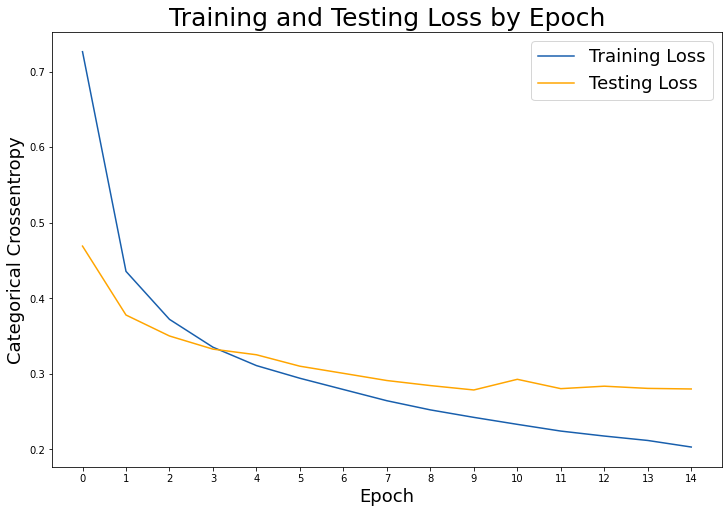

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [ ]:
def create_trace(X, y, ylabel, color):
  trace = go.Scatter(
      x = X, y = y,
      name=ylabel,
      marker=dict(color=color),
      mode= "markers+lines",
      text=X
  )
  return trace

In [ ]:
def plot_loss_acc(history):
  hist = history.history
  loss = hist['loss']
  val_loss = hist['val_loss']
  acc = hist['acc']
  val_acc = hist['val_acc']
  epochs = list(range(1, len(acc)+1))

  trace_tl = create_trace(epochs, loss, "Taining Loss", "Purple")
  trace_vl = create_trace(epochs, val_loss, "Validation Loss", "Green")
  trace_ta = create_trace(epochs, acc, "Training Accuracy", "Red")
  trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "Gold")

  fig = ply.subplots.make_subplots(rows=1, cols=2, subplot_titles=("Training Loss and Validation Loss",
                                                            "Training Accuracy and Validation Accuracy"))
  fig.append_trace(trace_tl, 1, 1)
  fig.append_trace(trace_vl, 1, 1)
  fig.append_trace(trace_ta, 1, 2)
  fig.append_trace(trace_va, 1, 2)
  fig['layout']['xaxis'].update(title = 'Epoch')
  fig['layout']['xaxis2'].update(title = 'Epoch')
  fig['layout']['yaxis'].update(title = 'Loss', range=[0,1])
  fig['layout']['yaxis2'].update(title = 'Accuracy', range=[0,1])

    
  iplot(fig, filename='loss_acc')
plot_loss_acc(history)

In [ ]:
# Evaluate model on test data.
cnn_score = model.evaluate(X_test_sc,
                               y_test,
                               verbose=1)

cnn_labels = model.metrics_names

# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')


313/313 [==============================] - 3s 8ms/step - loss: 0.2800 - acc: 0.9123
CNN loss  : 0.2799924910068512
CNN acc   : 0.9122999906539917


In [ ]:
test_data = (X_test_sc + y_test)

In [ ]:
pred_classes = model.predict_classes(X_test_sc)
y_true = test_data.iloc[:, 0]

In [ ]:
p = pred_classes[:10_000]
y = y_true[:10_000]

correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!==y)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

In [ ]:
targets = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, pred_classes, target_names=targets))